# Homework 4 Question 1: Moving averages
There are many ways to model the relationship between an input sequence
{$u_1, u_2, . . . $} and an output sequence {$y_1, y_2, . . . $}. In class, we saw the moving average (MA) model,
where each output is approximated by a linear combination of the k most recent inputs:

$$ MA: y_t ≈ b_1u_t + b_2u_{t−1} + · · · + b_ku_{t−k+1} $$

We then used least-squares to find the coefficients $b_1, . . . , b_k$. What if we didn’t have access to the
inputs at all, and we were asked to predict future $y$ values based only on the previous $y$ values? One
way to do this is by using an autoregressive (AR) model, where each output is approximated by a
linear combination of the $\ell$ most recent outputs (excluding the present one):

$$ AR: y_t ≈ a_1y_{t−1} + a_2y_{t−2} + · · · + a_{\ell}y_{t−\ell} $$

Of course, if the inputs contain pertinent information, we shouldn’t expect the AR method to outperform
the MA method!


__a) Using the same dataset from class uy_data.csv, plot the true $y$, and on the same axes, also plot
the estimated $ˆy$ using the MA model and the estimated $ˆy$ using the AR model. Use k = 5 for
both models. To quantify the difference between estimates, also compute $||y − yˆ||$ for both cases.__

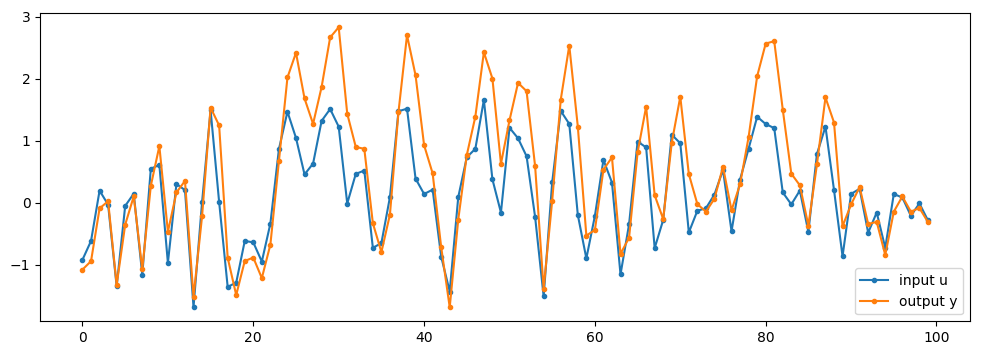

In [1]:
# Load the data file (ref: Boyd/263)
raw = readcsv("uy_data.csv");
u = raw[:,1];
y = raw[:,2];
T = length(u)

# plot the u and y data
using PyPlot
figure(figsize=(12,4))
plot([u y],".-");
legend(["input u", "output y"], loc="lower right");

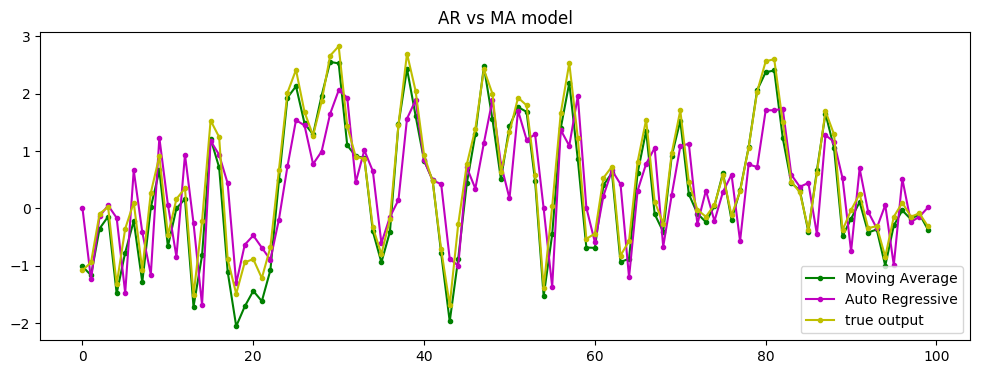


Norm for MA :2.460854388269911
Norm for AR :7.436691765656794


In [4]:
# generate A matrix. Using more width creates better fit.  (MA model)
width = 5
AR = zeros(T,width)
for i = 1:width
    AR[i+1:end,i] = y[1:end-i]
end
woptAR = AR\y
yestAR = AR*woptAR

AM = zeros(T,width)
for i = 1:width
    AM[i:end,i] = u[1:end-i+1]
end
woptMA = AM\y
yestMA = AM*woptMA

figure(figsize=(12,4))
plot(yestMA,"g.-",yestAR,"m.-", y, "y.-")
legend(["Moving Average", "Auto Regressive","true output"], loc="lower right");
title("AR vs MA model");
println()
println("Norm for MA :",norm(yestMA-y))
println("Norm for AR :",norm(yestAR-y))

__b) Yet another possible modeling choice is to combine both AR and MA. Unsurprisingly, this is
called the autoregressive moving average (ARMA) model:__

$$ARMA: y_t ≈ a_1y_{t−1} + a_2y_{t−2} + · · · + a_{\ell}y_{t−\ell} + b_1u_t + b_2u_{t−1} + · · · + b_ku_{t−k+1}$$


__Solve the problem once more, this time using an ARMA model with $k = \ell = 1$. Plot $y$ and $ˆy$ as
before, and also compute the error $||y − yˆ||$.__

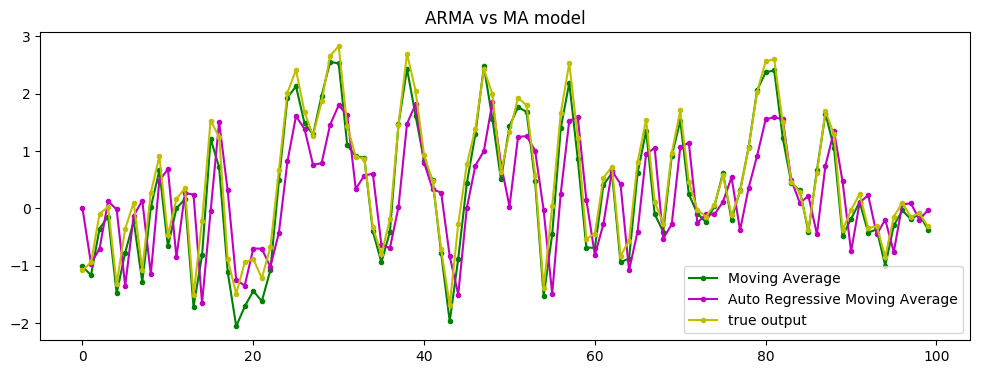


Norm for ARMA :8.188566344408953


In [7]:
# generate A matrix. Using more width creates better fit.  (MA model)
k = 1
l = 1
width = k + l
ARMA = zeros(T,width)
for i = 1:l
    ARMA[i+1:end,i] = y[1:end-i]
end
for i = l+1:width
    ARMA[i:end,i] = u[1:end-i+1]
end
woptARMA = ARMA\y
yestARMA = ARMA*woptARMA

figure(figsize=(12,4))
plot(yestMA,"g.-",yestARMA,"m.-", y, "y.-")
legend(["Moving Average", "Auto Regressive Moving Average","true output"], loc="lower right");
title("ARMA vs MA model");
println()
println("Norm for ARMA :",norm(yestARMA-y))